### part6 - Reinforcement Learning - Thompson_sampling

### Reference

- https://brunch.co.kr/@chris-song/66
- http://www.kwangsiklee.com/2018/03/%ED%86%B0%EC%8A%A8-%EC%83%98%ED%94%8C%EB%A7%81thompson-sampling%EC%97%90-%EB%8C%80%ED%95%9C-%EC%A7%81%EA%B4%80%EC%A0%81%EC%9D%B8-%EC%9D%B4%ED%95%B4/

banner1: [0.2202428]
banner2: [0.30334424]
banner3: [0.42369694]


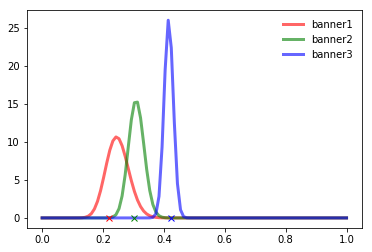

In [2]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)

# UCB : Deterministic / Requires update at every round
# TS : Probabilistic / Can accommodate delayed feedback / Better empirical evidence

# mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
ax.plot(x, beta.pdf(x, 33, 100), 'r-', lw=3, alpha=0.6, label='banner1')
ax.plot(x, beta.pdf(x, 100, 223), 'g-', lw=3, alpha=0.6, label='banner2')
ax.plot(x, beta.pdf(x, 435, 611), 'b-', lw=3, alpha=0.6, label='banner3')

banner1_rvs = beta.rvs(33, 100, size=1)
banner2_rvs = beta.rvs(100, 223, size=1)
banner3_rvs = beta.rvs(435, 611, size=1)

print("banner1:", banner1_rvs)
print("banner2:", banner2_rvs)
print("banner3:", banner3_rvs)

ax.plot(banner1_rvs, 0, 'x', color='red')
ax.plot(banner2_rvs, 0, 'x', color='green')
ax.plot(banner3_rvs, 0, 'x', color='blue')

ax.legend(loc='best', frameon=False)
plt.show()

### note

- When the instructor says "pull a value" he means that we are pulling the lever of the slot machine and getting some sort of dollar amount as a return. We can then add this return value to our distribution. 

### lecture note

![alt text](ts_2.png)
![alt text](ts_3.png)
![alt text](ts_4.png)
![alt text](ts_5.png)
![alt text](ts_6.png)
![alt text](ts_7.png)
![alt text](ts_8.png)
![alt text](ts_9.png)

### UCB vs Thompson Sampling

![alt text](UCB_vs_Thomsom_sampling.png)

### code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

%matplotlib inline

In [4]:
# Importing the dataset

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [6]:
# Implementing Thompson Sampling

N = 10000
d = 10
ads_selected = []

numbers_of_rewards_1 = [0 for i in range(d)]
numbers_of_rewards_0 = [0 for i in range(d)]

total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(
            numbers_of_rewards_1[i] + 1,
            numbers_of_rewards_0[i] + 1
        )
        
        if max_random < random_beta:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    
    total_reward += reward

In [7]:
total_reward

2605

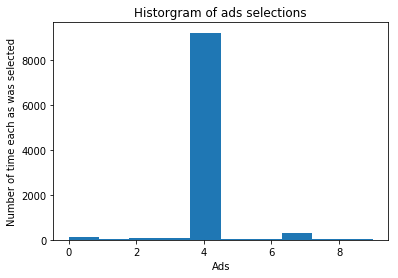

In [8]:
# visualising the results

plt.hist(ads_selected)
plt.title("Historgram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of time each as was selected")
plt.show()